# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».
# 1  Описание данных¶
Name — название игры
Platform — платформа
Year_of_Release — год выпуска
Genre — жанр игры
NA_sales — продажи в Северной Америке (миллионы долларов)
EU_sales — продажи в Европе (миллионы долларов)
JP_sales — продажи в Японии (миллионы долларов)
Other_sales — продажи в других странах (миллионы долларов)
Critic_Score — оценка критиков (максимум 100)
User_Score — оценка пользователей (максимум 10)
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.


# Ознакомление с данными

## 2  Импортируем библиотеки¶

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

## 3  Загружаем данные

In [2]:
data = pd.read_csv('datasets/games.csv')

In [3]:
display(data.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## 4  Изучение общей информации:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Изучив общую информацию замечаем явное несоответсвие типов некоторых столбцов. Столбец Year_of_Release должен быть int, User_Score - float.

In [5]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Видим не большое кол-во пропусков в столбцах с именем, названием платформы и жанром. Очень много пропусков в оценках критиков/пользователей и рейтинге

In [6]:
data[data.duplicated()].count()

Name               0
Platform           0
Year_of_Release    0
Genre              0
NA_sales           0
EU_sales           0
JP_sales           0
Other_sales        0
Critic_Score       0
User_Score         0
Rating             0
dtype: int64

Явных дубликатов в данных не обнаружено.


# Предобработка данных

Приведем названия столбцов к нижнему регистру:

In [7]:
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Изменим тип данных в столбцах:

Столбец year_of_release

In [8]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Сложно понять природу пропущенных значений. Возможно, игры очень старые/мало известные. Заметим, что в некоторых названиях игр присутствует год(Madden NFL 2004, FIFA Soccer 2004...), но это не дает нам уверенности, что именно тогда игра и вышла.

Пропуски придётся удалить(удаление менее 2% данных не критично). Также удалим пропуски в столбцах с именем и жанром.


In [9]:
data = data.dropna(subset=['year_of_release', 'name'])
data['year_of_release'] = data['year_of_release'].astype('int')

In [10]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Столбец user_score и critic_score:

Изучим уникальные значения


In [11]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Видим среди оценок пользователей строку tbd, что с английского - To Be Determined, и означает критически малое кол-во отзывов. Посмотрим сколько таких игр:


In [12]:
data[data['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [13]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

С оценками критиков таких проблем нет

Чтобы работать с user_score, придется заменить tbd на число, например -1(чтобы не пересекалось с реальными оценками)


In [14]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)
data['user_score'] = data['user_score'].astype('float')
data['critic_score'] = data['critic_score'].fillna(-1)
data['user_score'] = data['user_score'].fillna(-1)

In [15]:
display(data.info())
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


None

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6676
dtype: int64

Столбец с рейтингом:

In [16]:
data[data['rating'].isna() & (data['user_score'] == -1)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,-1.0,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,NaN


Путем нехитрых преобразований, узнаем, что в играх с критически малым количеством оценок, отсутвует и рейтинг. Вероятно это совсем не популярные или очень старые игры, рейтинг определеить мы не можем, и опять заменим NaN на показательное значение.

In [17]:
data['rating'] = data['rating'].fillna('No')

In [18]:
display(data.info())
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


None

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Теперь все пропуски удалены, данные приведены к нужным типам, проблем нет

Сделаем отдельный столбец с суммами продаж

In [19]:
data['sales_total'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

# Анализ данных

Создадим сводную таблицу для анализа данных по годам:


In [20]:
year_pv = pd.pivot_table(data, index='year_of_release', values='name', aggfunc='count')
year_pv.columns = ['games_count']
year_pv

,games_count
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Text(0, 0.5, 'Год')

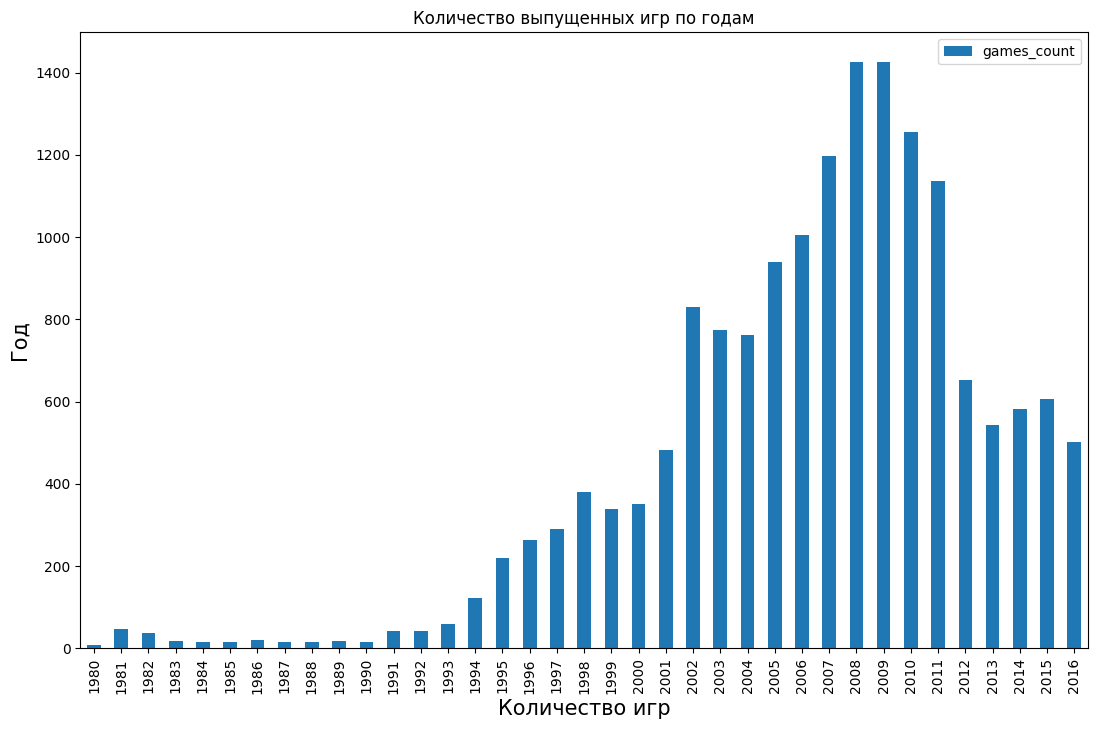

In [21]:
year_pv.plot(kind='bar', figsize=(13, 8))
plt.title('Количество выпущенных игр по годам')

plt.xlabel("Количество игр", fontsize=15)
plt.ylabel("Год", fontsize=15)

Как мы видим данные важны не по всем периодам.

С 1980 годов по 2000 было мало компаний и индустрия игр не была сильно развита. Резкий скачок по количеству игр, произошел в 2002 году. Пик - 2008-2009 года. Дальнейший спад можно объяснить перенасыщением рынка или развитием телеофнных игр.


In [22]:
sales_pv = pd.pivot_table(data, index=['platform'], values='sales_total', aggfunc='sum')
sales_pv = sales_pv.sort_values('sales_total',ascending=False)
sales_pv

,sales_total
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [23]:
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

In [24]:
top_data = data[data['platform'].isin(top_platforms)]


In [25]:
sales_pv = pd.pivot_table(top_data, index=['platform'], values='sales_total', aggfunc='sum')
sales_pv = sales_pv.sort_values('sales_total',ascending=False)
sales_pv

,sales_total
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58


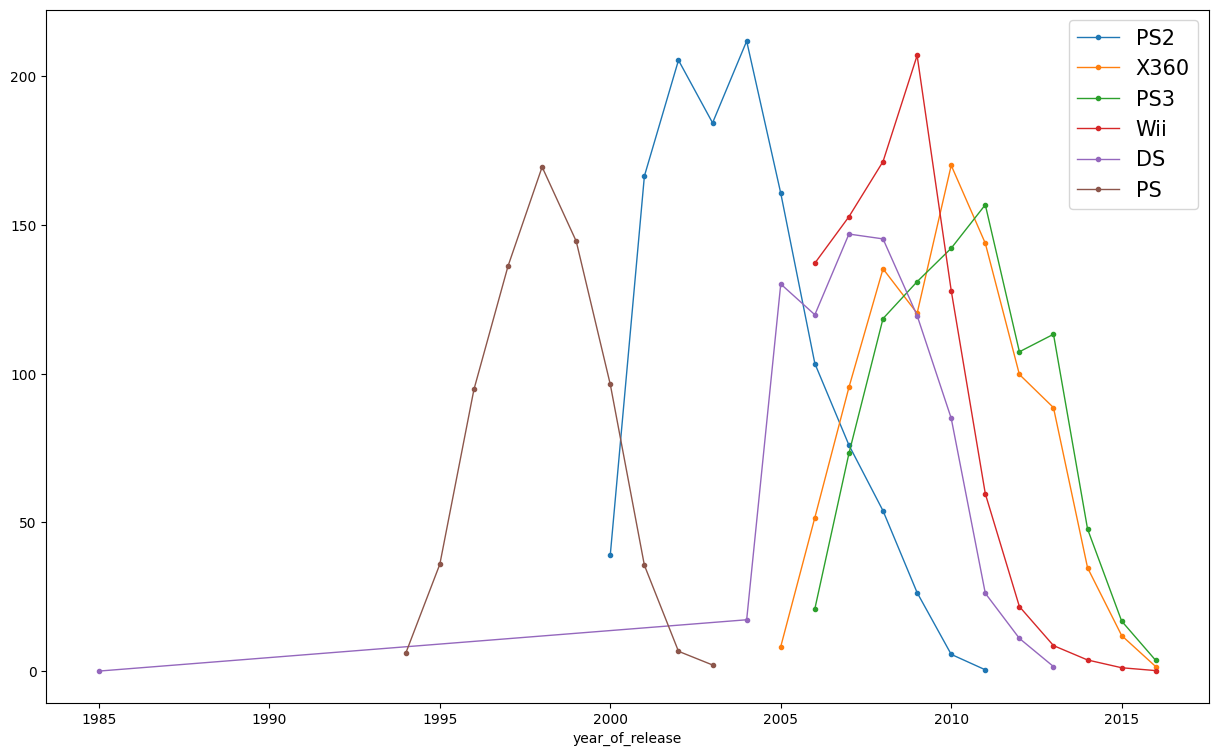

In [26]:
ax = plt.gca()
legend_list = []
for platform in top_platforms:
    df_to_plot = top_data.query('platform == @platform')
    lines = df_to_plot.groupby('year_of_release')['sales_total'].sum().plot(x='year_of_release', y='sales_total',
                                                                    style='.-', kind='line', fontsize=10,
                                                                    linewidth=1, label=platform, ax=ax, figsize=(15, 9))
    legend_list.append(platform)
ax.legend(legend_list, prop={'size':15})

Посмотрим, сколько времени живут платформы.

PS - была популярна с 1994 года до 2002, около 10 лет; PS2 - была популярна с 2000 до 2010 года - 10 лет; PS3 - с 2006 по по 2016? Так как данные обрываются, сказать наверняка не можем. Популярность теряется после выхода ps4; DS - вышла в 1985, и была не популярна до 2004 года. И с 2004 года популярность стала расти, пик в 2008, конец срока службы - 2013 год - 8 активных лет жизни; Wii - с 2006 по 2016? Похожая с ps3 ситуация, консоль себя изжила и теряет популрность.

Таким образом, в среднем консоль живет 9-10 лет. Период определяется выходом более современных консолей.

Актуальным периодом по продажам считаю с 2006 по 2016 год.

    Появление на рынке новой платформы PS4 говорит от том, что она просуществует 2 или 3 года и рост продаж для этой платформы ожидается на 2017-18 год.
    в этом периоде представлены данные по абсолютно всем самым популярным консолям.

эти данные помогут построить прогноз на 2017 год.


In [27]:
actual_data = data.query('year_of_release >= 2013')

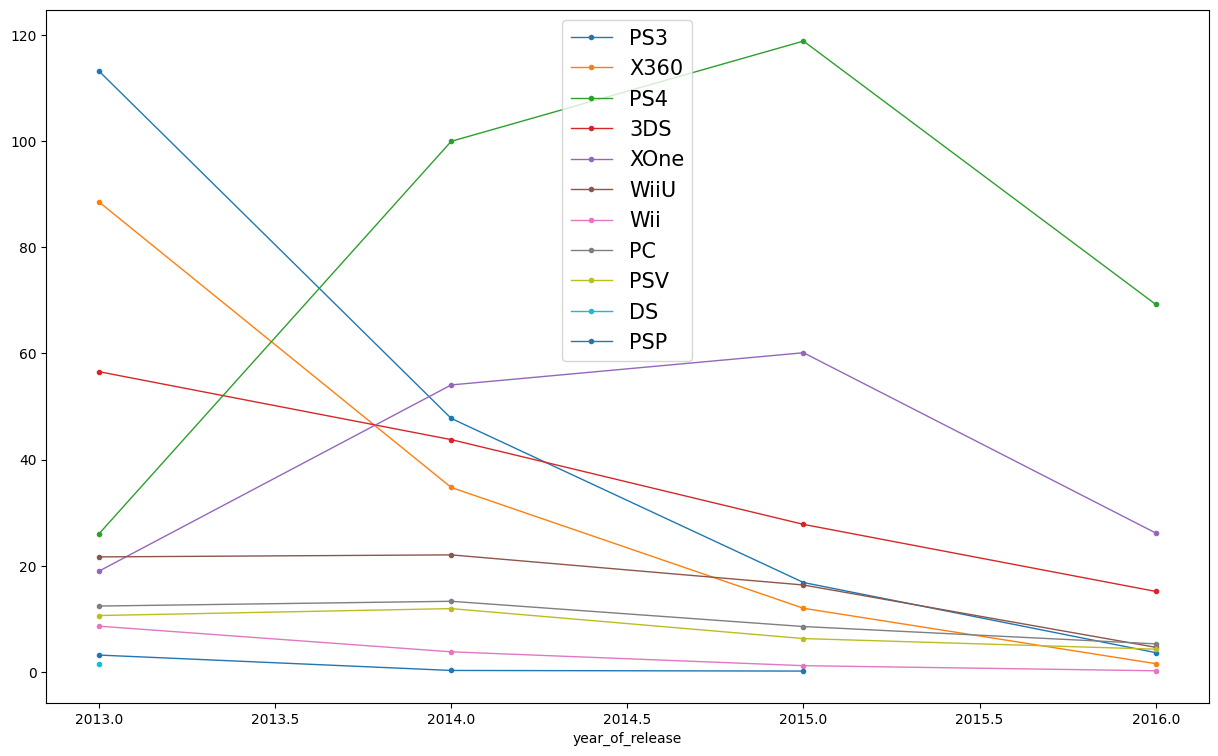

In [28]:
ax = plt.gca()
legend_list = []
t = actual_data['platform'].unique().tolist()
for platform in t:
    df_to_plot = actual_data.query('platform == @platform')
    lines = df_to_plot.groupby('year_of_release')['sales_total'].sum().plot(x='year_of_release', y='sales_total',
                                                                    style='.-', kind='line', fontsize=10,
                                                                    linewidth=1, label=platform, ax=ax, figsize=(15, 9))
    legend_list.append(platform)
ax.legend(legend_list, prop={'size':15})

На конец 2016 года можем выделить 3 особенно прибыльных платфрмы: PS4, Xone, 3DS. Причем, количество продаж игр, выпущенных на каждую из этих платформ, снижается.

# 5  Boxplot по глобальным продажам игр и с разбивкой по платформам.

(0.0, 5.0)

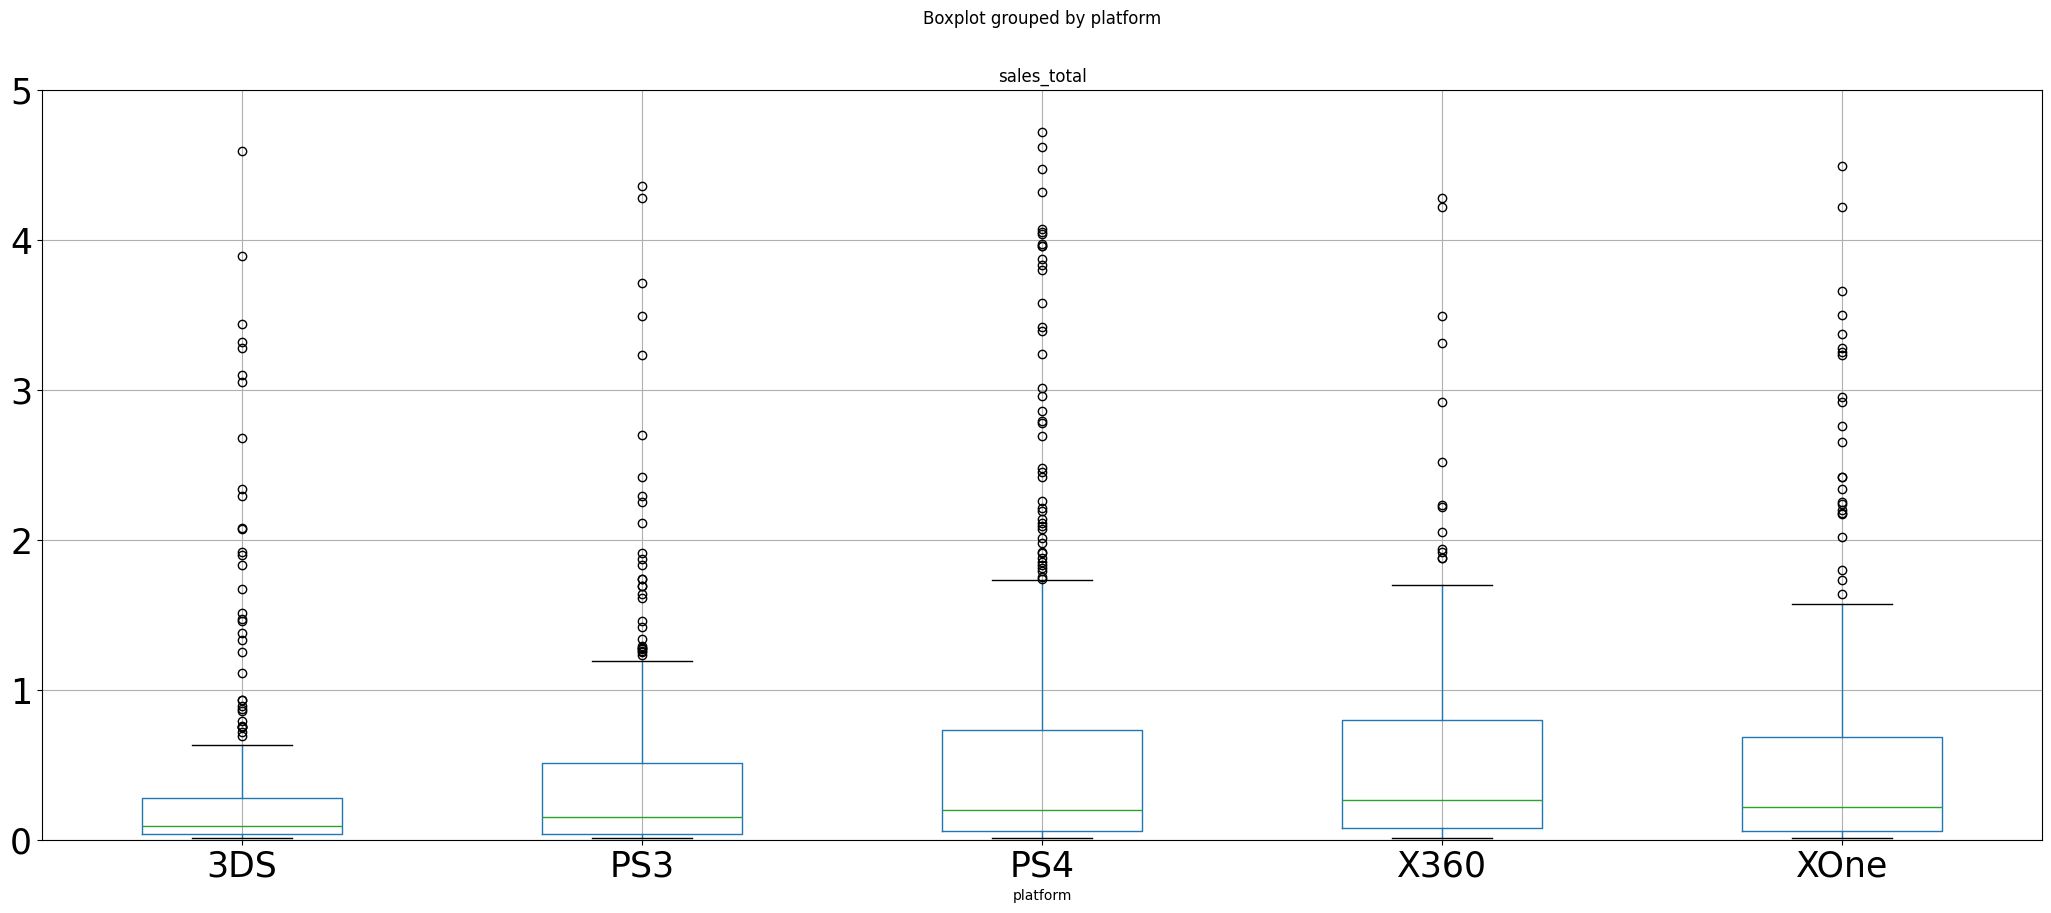

In [29]:
top_platforms = ['PS4', 'PS3', 'XOne', 'X360', '3DS']
top_data = actual_data[actual_data['platform'].isin(top_platforms)]
ax = top_data.boxplot(column='sales_total', by='platform', fontsize=25, figsize=(25,10))
ax.set_ylim([0, 5])

Разница в продажах отличается. Имеются очень популярные игры, которые продаются годами и дают много прибыли, таковых единицы. И много игр, которые не смогли преодолеть порог в 400 тыс. долларов за выбранный период.

Период 2013-2016 год

Медиана по топовым платформам варьируется от 0,2 до 0,25 млн долларов прибыли за игру. Верхняя граница предела, за которыми уже определяются аномалии, у двух платформ - PS3 и X360 - на уровне 1,7 млн долларов. У остальных - от 1 до 1,5 миллионов долларов.

Для PS4, PS3 и 3DS видна положительная тенденция к росту продаж. Средняя больше 3го квантиля, это значит на эти платформы делаются более популярные и продаваемые игры, чем на XOne и X360.


# 6  Влияние отзывов пользователей и критиков на продажи.

Если выбирать одну популярную платформу для анализа, лучше взять PS3 по ней много данных, при этом даже на конец 2016 года она является одной из самых популярных игровых платформ.

In [30]:
data_ps3 = actual_data[(actual_data['platform'] == 'PS3') & (actual_data['critic_score'] > 0)].copy()

In [31]:
data_ps3

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
126,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E,6.46
149,The Last of Us,PS3,2013,Action,2.41,2.18,0.28,0.99,95.0,9.1,M,5.86
337,Assassin's Creed IV: Black Flag,PS3,2013,Action,1.33,1.68,0.13,0.57,88.0,8.1,M,3.71
...,...,...,...,...,...,...,...,...,...,...,...,...
15418,Xblaze: Lost Memories,PS3,2015,Adventure,0.02,0.00,0.00,0.00,63.0,6.2,M,0.02
15533,Battle Princess of Arcadias,PS3,2013,Role-Playing,0.00,0.00,0.02,0.00,69.0,7.9,T,0.02
15742,Invizimals: The Lost Kingdom,PS3,2013,Action,0.00,0.02,0.00,0.00,50.0,5.0,E10+,0.02
15880,Turbo: Super Stunt Squad,PS3,2013,Sports,0.00,0.01,0.00,0.00,38.0,-1.0,E,0.01


<Axes: xlabel='critic_score', ylabel='sales_total'>

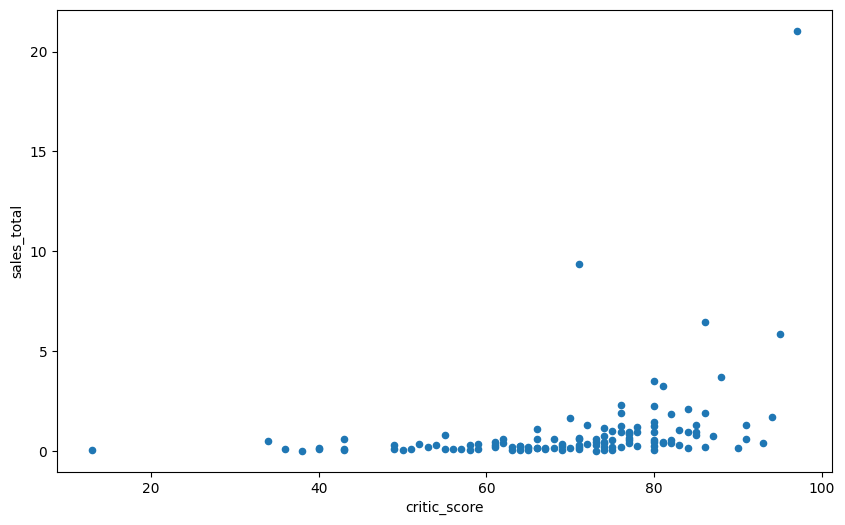

In [32]:
data_ps3.plot(kind='scatter', x='critic_score', y='sales_total', figsize=(10,6))

С увеличением среднего рейтинга критиков увеличивается и средний уровень выручки с продажи игр, что логично: чем качественнее игра, тем больше денег она приносит разработчику и издателю.

Рассмотрим диаграму рассеяния оценок пользователей и числа продаж


<Axes: xlabel='user_score', ylabel='sales_total'>

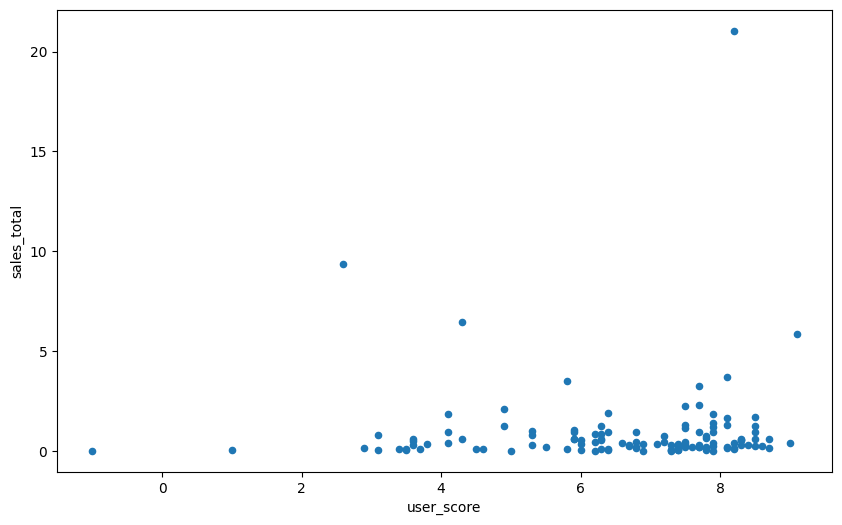

In [33]:
data_ps3.plot(kind='scatter', x='user_score', y='sales_total', figsize=(10,6))

Видим примерно ту же картину, но с увеличенным числом выбросов. Объясняется тем, что оценки пользователей не объективны и иногда поспешны, в отличие от критиков.

Ориентируясь на диаграммы рассеяния и таблицу корреляции, можем сделать вывод: Сильнее всего на конечную стоимость влияет оценка критиков. Сильнее меньше, практически не влияет - оценка пользователей.


Рассмотрим продажи игр и на дргугих платформах

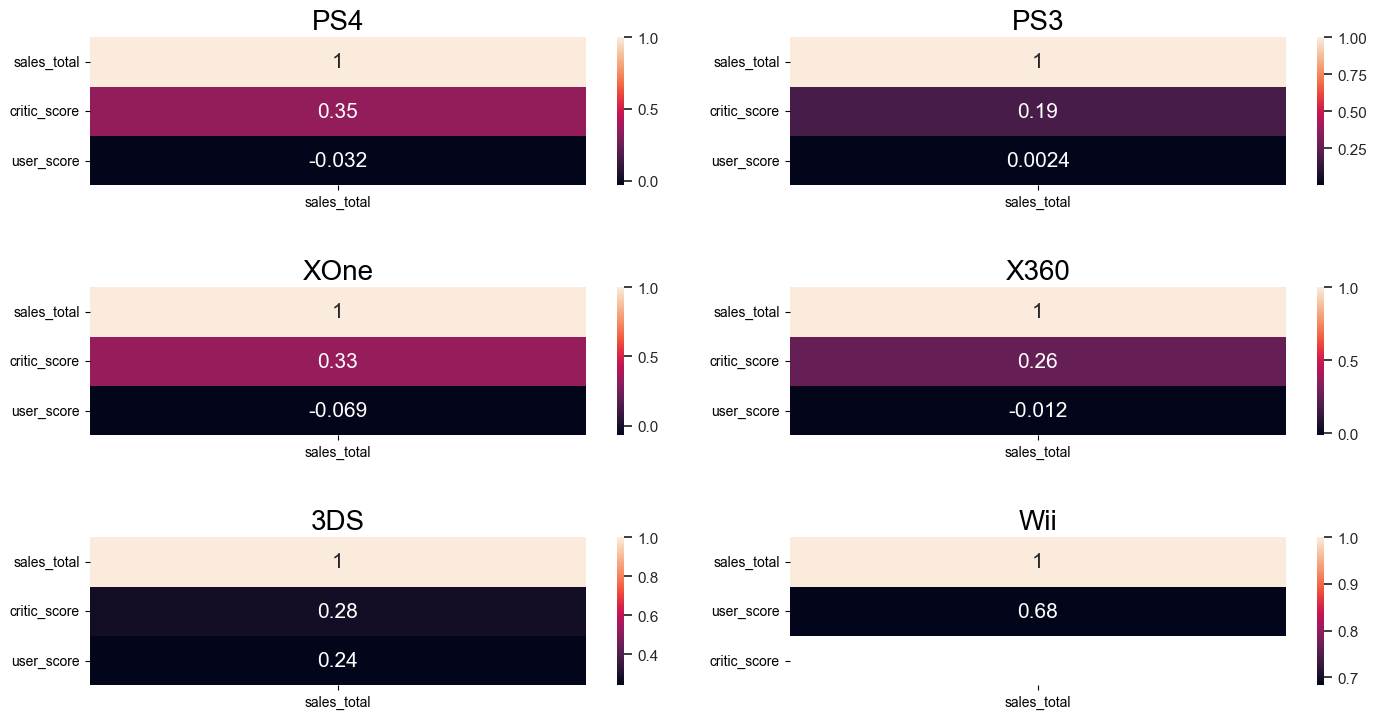

In [34]:
 top_platforms = ['PS4', 'PS3', 'XOne', 'X360', '3DS', 'Wii'] #'PS2', 'X360', 'PS3', , 'DS', 'PS'

rows = len(top_platforms) // 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(15,8))
count = 0
for r in range(rows):
    for c in range(cols):
        curr_platform = top_platforms[count]
        df_prep = actual_data[(actual_data['platform'] == curr_platform) & (actual_data['user_score'] > 0)].copy()
        
        df_filtered = df_prep[['sales_total' ,'critic_score', 'user_score']]
        sns.set(font_scale=1.0)
        ax = sns.heatmap(df_filtered.corr()[['sales_total']].sort_values(by='sales_total', ascending=False), 
                         annot=True, annot_kws={'size':15}, ax=axes[r,c])
        ax.set_title(curr_platform, fontsize=20)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
        plt.tight_layout(pad=3)
        count += 1

Платформы PS3, XOne и X360 имеют похожие связи, как и у PS4.

Выделяется 3DS, чьи продажи зависят напрямую, хоть и не сильно от рейтинга игроков. Возможно здесь идет лучше работа по составлению рейтинга для игр и системы отзывов для игроков. А может игры в целом очень популярные и интересные и их не очень много, как у других платформ.

Выделяются Wii и 3DS, по которым зависимость не такая большая(по сравнению с данными по датафрейму).


# 7  Распределение игр по жанрам.

In [35]:
genre_pv = pd.pivot_table(actual_data, index='genre', values='sales_total', aggfunc='median')
genre_pv.sort_values('sales_total', ascending=False)

,sales_total
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125
Racing,0.120
Action,0.110
Simulation,0.100
Misc,0.100


<Axes: xlabel='genre'>

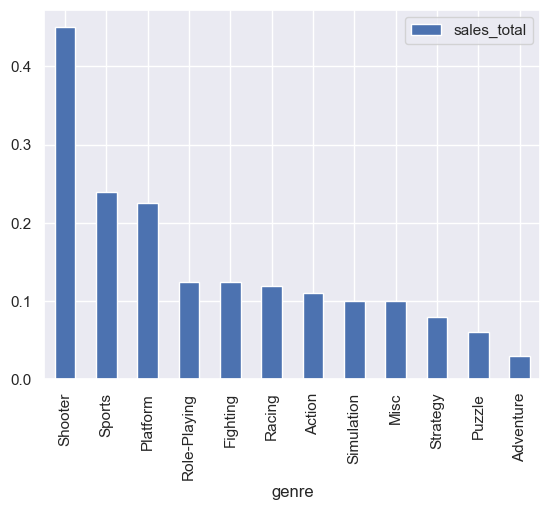

In [36]:
genre_pv.sort_values('sales_total', ascending=False).plot(kind='bar')

Самыми прибыльными жанрами можно считать шутеры(Shooter),спортивные игры (Sports), платформеры(platform), и ролевые игры (Role-Playing). Msc - игры смешанного жанра. Разработка таких игр дорогая, и они не требуют столько концтрации как аутайдеры списка - Стратегии, Приключенские игры (удивительно), Паззлы.


# Составление портрета пользователя каждого региона

Напишем функцию для реализации сводных таблиц

In [37]:
def regions_pv(groupby, region_sales):
    pivot = actual_data.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    return pivot

Самые популярные платформы (топ-5).

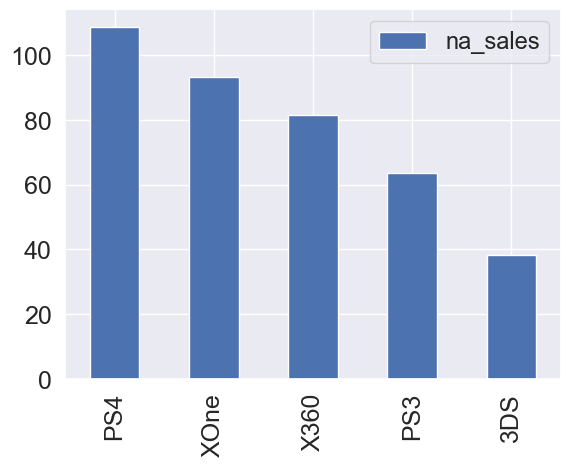

In [38]:
na_pv = regions_pv('platform', 'na_sales')
plot = na_pv.plot(kind='bar', 
                   fontsize=18)
plot.legend(prop={'size':17})
plot.set_xlabel('')
plot.title.set_size(20)

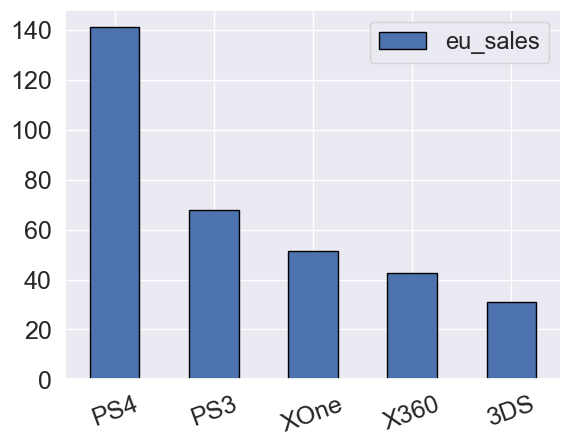

In [39]:
eu_pv = regions_pv('platform', 'eu_sales')
plot = eu_pv.plot(kind='bar', ec='black', 
                   fontsize=18, rot=20)
plot.legend(prop={'size':17})
plot.set_xlabel('')
plot.title.set_size(20)

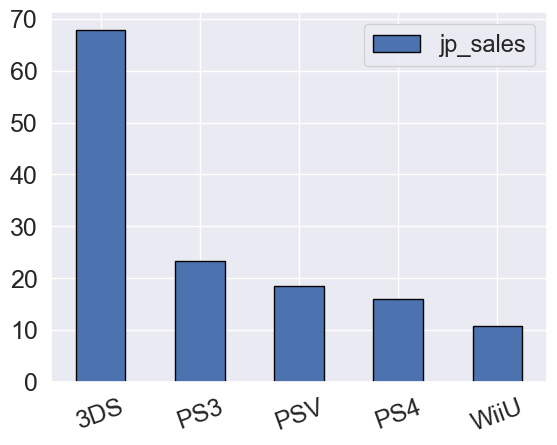

In [40]:
jp_pv = regions_pv('platform', 'jp_sales')
plot = jp_pv.plot(kind='bar', ec='black', 
                   fontsize=18, rot=20)
plot.legend(prop={'size':17})
plot.set_xlabel('')
plot.title.set_size(20)

В Америке, видим явную популярность PS4, далее идут X0ne и X360 В Европе,с большим отрывом популярна PS4, далее идет PS3, Xone, X360. В Японии лидирующие позиции занимает 3DS. Далее ps3, psv, ps4 на одном уровне.

Определение самых популярных жанров в регионах:

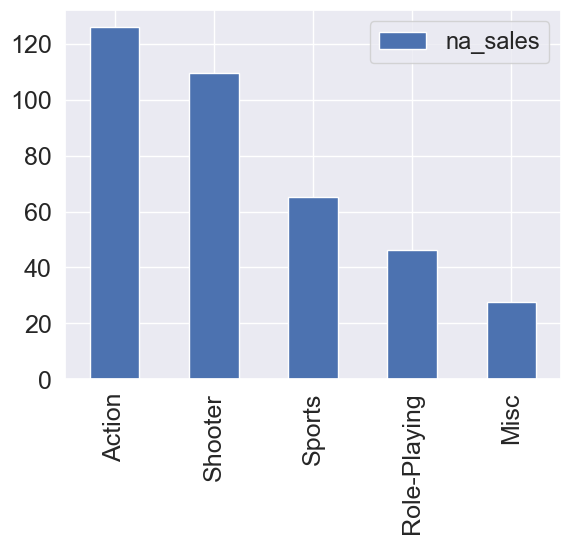

In [41]:
na_pv = regions_pv('genre', 'na_sales')
plot = na_pv.plot(kind='bar', 
                   fontsize=18)
plot.legend(prop={'size':17})
plot.set_xlabel('')
plot.title.set_size(20)

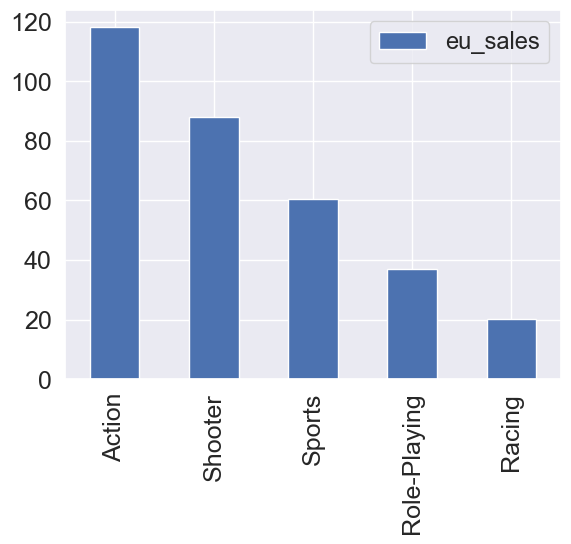

In [42]:
eu_pv = regions_pv('genre', 'eu_sales')
plot = eu_pv.plot(kind='bar', 
                   fontsize=18)
plot.legend(prop={'size':17})
plot.set_xlabel('')
plot.title.set_size(20)

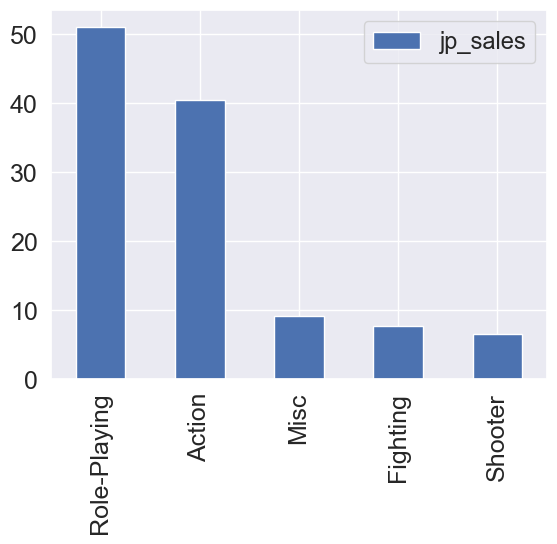

In [43]:
jp_pv = regions_pv('genre', 'jp_sales')
plot = jp_pv.plot(kind='bar', 
                   fontsize=18)
plot.legend(prop={'size':17})
plot.set_xlabel('')
plot.title.set_size(20)

Интересы пользователей из Америки и Европы схожи,лидирует жанр Action, а после него на равне идут жанр shooter и sport.

Ситуация с Японией соверешенно иная, там с большим отрывом, лидирует жанр Role-Playing. Возможно это связано с их уникальной культурой и своим взглядом на видеоигры. А после него жанр экшен.


Влияние рейтинга ESRB на продажи в регионе.

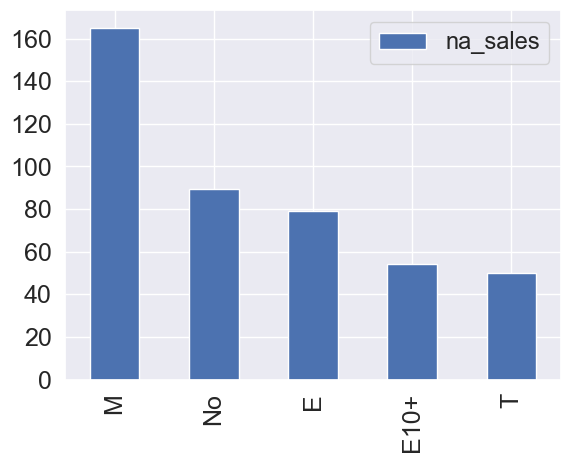

In [44]:
na_pv = regions_pv('rating', 'na_sales')
plot = na_pv.plot(kind='bar', 
                   fontsize=18)
plot.legend(prop={'size':17})
plot.set_xlabel('')
plot.title.set_size(20)

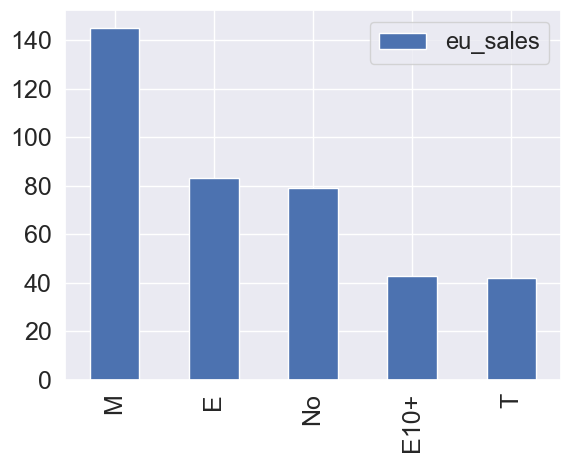

In [45]:
eu_pv = regions_pv('rating', 'eu_sales')
plot = eu_pv.plot(kind='bar', 
                   fontsize=18)
plot.legend(prop={'size':17})
plot.set_xlabel('')
plot.title.set_size(20)

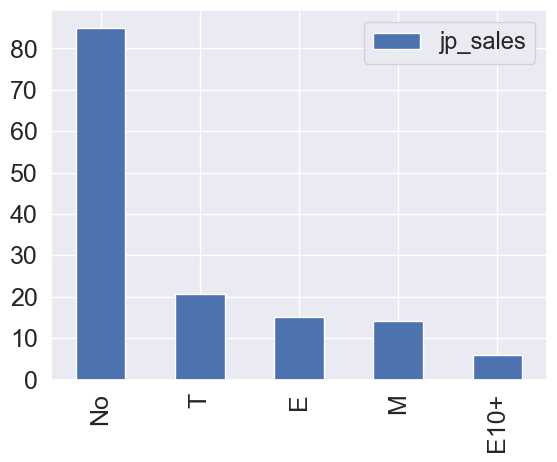

In [46]:
jp_pv = regions_pv('rating', 'jp_sales')
plot = jp_pv.plot(kind='bar', 
                   fontsize=18)
plot.legend(prop={'size':17})
plot.set_xlabel('')
plot.title.set_size(20)

В Северной Америке и в Европе картина практически одинаковая. Большая часть выручки получено с игр с рейтингом "M", далее идут игры без рейтинга или для всех возрастов.

В Японии все совсем иначе, для большого числа игр не был указан рейтинг. Можем предположить, что это означает рейтинг для всех возрастов.(львиная доля продаж приходится на рейтинг "E")


# Проверка гипотез

Гипотезы:

средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
средние пользовательские рейтинги жанров Action и Sports разные.

в обоих случаях выборки независимы между собой, значит будем использовать t-критерий Стьюдента.

alpha = 0.05


# 8  Гипотеза № 1 - средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

альтернативная гипотеза - средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.


In [47]:
alpha = 0.05
x_rating = actual_data[(actual_data['platform'] == 'XOne') & (actual_data['user_score'] > 0)]['user_score']
pc_ratings = actual_data[(actual_data['platform'] == 'PC') & (actual_data['user_score'] > 0)]['user_score']
results = ttest_ind(x_rating, pc_ratings)
print('p-значение:', results.pvalue)


if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 0.14012658403611647
Не отвергаем нулевую гипотезу


Рейтинги в целом похожи друг на друга, что и подтверждает нулевая гипотеза. Проверим:

In [48]:
print(f'Оценка пользователей для xbox {x_rating.mean()}')
print(f'Оценка пользователей для pc {pc_ratings.mean()}')

Оценка пользователей для xbox 6.521428571428572
Оценка пользователей для pc 6.2696774193548395


Гипотеза подтвердилась

# 9  Гипотеза № 2: средние пользовательские рейтинги жанров Action и Sports разные

нулевая гипотеза - средние пользовательские рейтинги жанров Action и Sports одинаковые.

альтернативная гипотеза - средние пользовательские рейтинги жанров Action и Sports отличаются между собой.


In [49]:
a_rating = actual_data[(actual_data['genre'] == 'Action') & (actual_data['user_score'] > 0)]['user_score']
sport_ratings = actual_data[(actual_data['genre'] == 'Sports') & (actual_data['user_score'] > 0)]['user_score']
results = ttest_ind(a_rating, sport_ratings)
print('p-значение:', results.pvalue)


if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


Смело отвергаем нулевую гипотезу. средние пользовательские рейтинги жанров Action и Sports отличаются между собой.

In [50]:
print(f'Оценка пользователей для action {a_rating.mean()}')
print(f'Оценка пользователей для sport {sport_ratings.mean()}')

Оценка пользователей для action 6.837532133676092
Оценка пользователей для sport 5.238124999999999


Так и есть, гипотеза подтверждена.
# Вывод

В ходе проделанной работы было выполнено:

Просмотрена таблица, выявлены аномалии и пропущенные значения.
Проведена предобработка таблицы: замена столбцов, заполнение пропусков, удаление дубликатов и т.д.
Проведен анализ по данным и подготовлены актуальные данные.
Составлены портреты пользователей для купных регионов продаж.
Выполнены проверки гипотез.

Провели анализ:

    Выпуск игр по годам: Рассмотрели выпуски игр по годам и выделили актуальный период с 2013-2016 год.

    Продажи по платформам: Изучили изменения в продажах по различным платформам. Выбрали платформы с наибольшими суммарными продажами и построим распределение по годам.'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS' Определили характерный срок появления новых и исчезновения старых платформ - около 8 лет.

    Лидирующие платформы и их динамика: Определили лидирующие платформы по продажам и выявим их динамику - падение.

    График "ящик с усами": Построили график "ящик с усами" по глобальным продажам игр с разбивкой по платформам. Для PS4, PS3 и 3DS видна положительная тенденция к росту продаж. Средняя больше 3го квантиля, это значит на эти платформы делаются более популярные и продаваемые игры, чем на XOne и X360.

    Влияние отзывов пользователей и критиков на продажи: С увеличением среднего рейтинга критиков увеличивается и средний уровень выручки с продажи игр, что логично: чем качественнее игра, тем больше денег она приносит разработчику и издателю.

Ориентируясь на диаграммы рассеяния и таблицу корреляции, можем сделать вывод: Сильнее всего на конечную стоимость влияет оценка критиков. Сильнее меньше, практически не влияет - оценка пользователей.

    Распределение игр по жанрам: Самыми прибыльными жанрами можно считать шутеры(Shooter),спортивные игры (Sports), платформеры(platform), и ролевые игры (Role-Playing).Аутайдеры списка - Стратегии, Приключенские игры (удивительно), Паззлы.

В результате составления портрета пользователя каждого региона мы выявиили, что пользователи из Северной Америки и Европы похожи, а из Японии отличается по всем критериям.

В результате проверки гипотез, мы выяснили, что:

1- средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 2- средние пользовательские рейтинги жанров Action и Sports отличаются между собой.

Продажи компьютерных игр зависят от:

- Студии которая создала игру
- Платформы на которой игра
- Жанра игры.

Сводный анализ для кампании на 2017 год.

Делать ставку на современные платформы (PS4).
Делать акцент в популярные жанры - экшен, шутеры, спортивные и ролевые игры.
Ориентироваться на ЦА, в основном это молодежь.